In [5]:
#!/usr/bin/env python3
# What: this python script was generated manually by Steven Elmlinger in February 2019

# Why: Convert all ELAN (.eaf) files in a directory to csv files

#
#
# step 1: load packages
#
#

import glob     # Import glob to easily loop over files
import pympi    # Import pympi to work with elan files
import os
import pprint as pp
import pandas as pd
import numpy as np

#
#
# step 2: load data
#
#

# subject list

'''
Enter in all of the subject IDs into the variable below, comma separated like the commented out example below.
'''

subjectarray = np.array([1, 10, 18, 21, 22, 23, 52, 57, 59, 60, 61, 64, 65, 1001, 1002, 1004, 1005, 1006, 1007])


# Define variables
corpus_root = 'eaf' # this is the folder name containing all eaf files
ort_tier_names = ['Caregiver voc', 'Infant voc'] # this is the tier name, do one tier at a time, and then append
directory = os.fsencode('{}/eaf/'.format(corpus_root))

#
#
# step 3: Initialize aggregator
#
#

columns = ['sub', 'onset', 'offset', 'cat', 'tier']
output = pd.DataFrame(columns=columns)



for a in range(len(subjectarray)):
    sub = subjectarray[a]
#     print(sub)
    flag = -1
    # Loop over all elan files the corpusroot subdirectory called eaf
    for file_path in glob.glob('{}/*.eaf'.format(corpus_root)):
        # Initialize the elan file
        flag = flag+1
        filename = os.path.basename(file_path)  #os.listdir(directory)[flag
        if filename == '.DS_Store':
            os.remove(file_path)  #os.path.join(directory.decode('utf-8'), filename.decode('utf-8')))
            break
        file = os.fsdecode(filename)
        print(file)

           
        if file == "S%d.eaf" % sub:
            # if file == "%d reliability subject.eaf" % sub:
            eafob = pympi.Elan.Eaf(file_path)
            # Loop over all the defined tiers that contain orthography
            for ort_tier in ort_tier_names:
                # If the tier is not present in the elan file spew an error and
                # continue. This is done to avoid possible KeyErrors
                # If the tier is present we can loop through the annotation data
                counter = -1
                all_utt = pd.DataFrame(columns=columns)
                for annotation in eafob.get_annotation_data_for_tier(ort_tier):
                    # We are only interested in the utterance
                    counter = counter+1
                    all_utt.loc[counter, 'sub'] = sub
                    all_utt.loc[counter, 'onset'] = annotation[0]/1000
                    all_utt.loc[counter, 'offset'] = annotation[1]/1000
                    all_utt.loc[counter, 'cat'] = annotation[2]
                    all_utt.loc[counter, 'tier'] = ort_tier
                output = output._append(all_utt)
#                 print(output)
            output = output.sort_values(['sub','onset'], ascending = [True,True])
        print(output)
#
#
# step 4: output individual .csv files
#
#

output.to_csv('tt_ab.csv',index = False, header = True)


ModuleNotFoundError: No module named 'pympi'

In [3]:
data = pd.read_csv('tt_ab.csv')
data.head(10)
print(data)

NameError: name 'pd' is not defined

In [96]:
data['group'] = ''
data.loc[(data['sub'] < 50), 'group'] = 'TD'
data.loc[(data['sub'] > 50)&(data['sub'] < 1000), 'group'] = 'ASD'
data.loc[(data['sub'] > 1000), 'group'] = 'DS'

data.index = data.index + 1

data['latency']=''
data['latency group']=''
for i in data.index:
    if i<data.index.max():
        before, new = data._get_value(i,'offset'), data._get_value(i+1,'onset')
        oldtier, newtier = data._get_value(i,'tier'), data._get_value(i+1,'tier')
        data._set_value(i+1,'latency',new-before)
        oldsub, newsub = data._get_value(i,'sub'), data._get_value(i+1,'sub')
    
            
        if oldtier=='Caregiver voc' and newtier=='Caregiver voc':
            data._set_value(i+1,'latency group','cg-cg')
        elif oldtier='Infant voc' and newtier=='Infant voc':
            data._set_value(i+1,'latency group','inf-inf')
        elif oldtier=='Caregiver voc' and newtier=='Infant voc':
            data._set_value(i+1,'latency group','cg-inf')
        elif oldtier=='Infant voc' and newtier=='Caregiver voc':
            data._set_value(i+1,'latency group','inf-cg')
            
        if oldsub!=newsub:
            data._set_value(i+1,'latency','NaN')
            data._set_value(i+1,'latency group','NaN')
    else:
        break

data['latency_milli'] = data['latency']*1000
data.to_csv('tt_milli.csv', index = True, header = True)


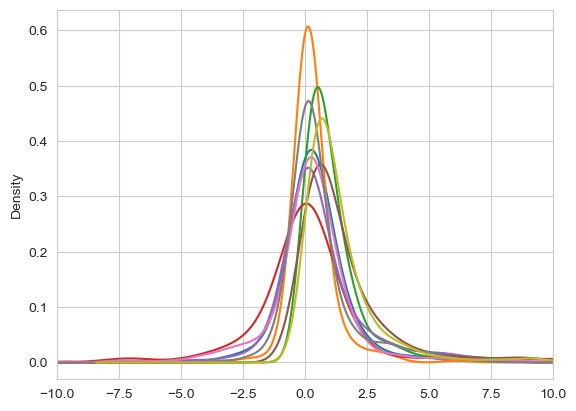

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

data['latency'] = pd.to_numeric(data['latency'],errors='coerce')
datanew = data.dropna()
# test = datanew['latency'].plot(kind='kde')
dataplot = datanew.groupby(['group','latency group'])['latency']
dataplot.plot(kind='kde')
plt.xlim([-10,10])
plt.show()


(0.0, 100.0)

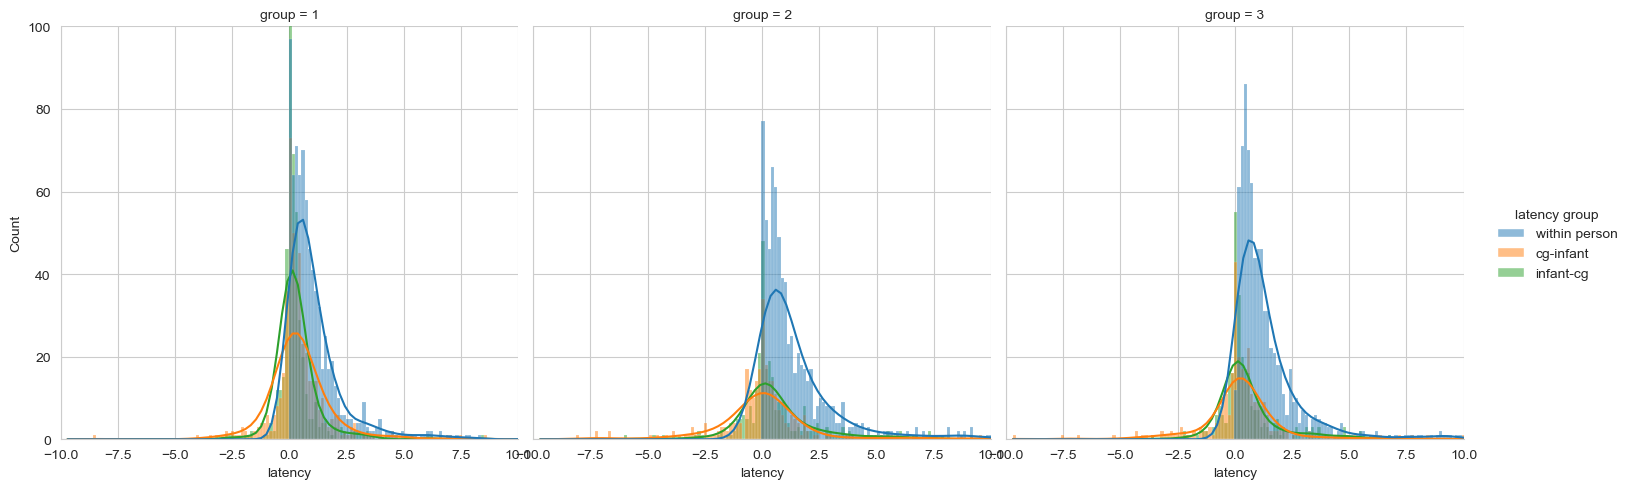

In [85]:
sns.displot(data=datanew, x='latency', kde=True, col='group', hue='latency group')
plt.xlim(-10,10)
plt.ylim(0,100)

(0.0, 3.0)

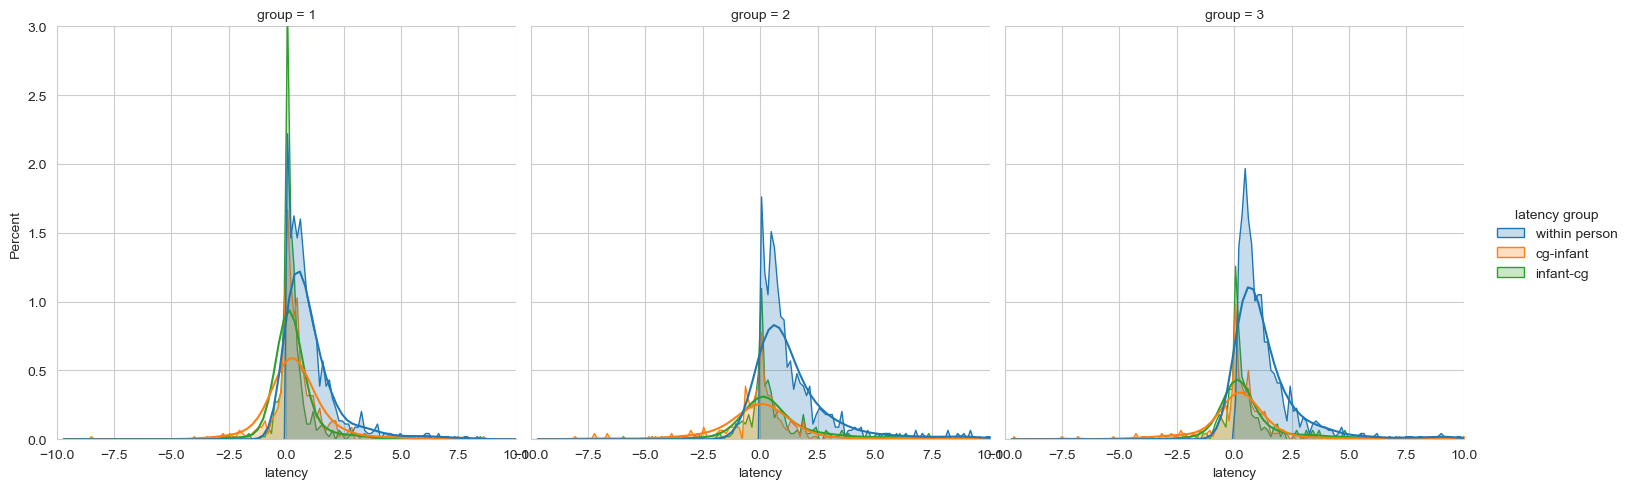

In [90]:
sns.displot(data=datanew, x='latency', kind="hist", stat="percent", element="poly", kde=True, col='group', hue='latency group')
plt.xlim(-10,10)
plt.ylim(0,3)

(0.0, 3.0)

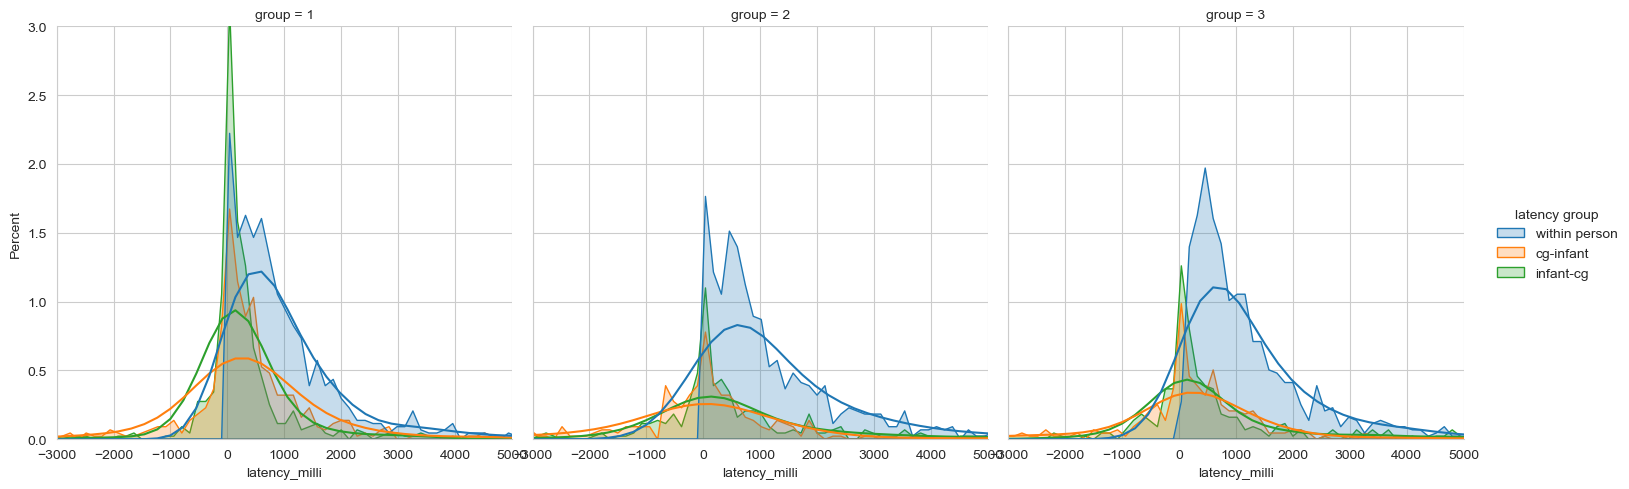

In [89]:
sns.displot(data=datanew, x='latency_milli', kind="hist", stat="percent", element="poly", kde=True, col='group', hue='latency group')
plt.xlim(-3000,5000)
plt.xticks([-3000,-2000,-1000,0,1000,2000,3000,4000,5000])
plt.ylim(0,3)

(0.0, 100.0)

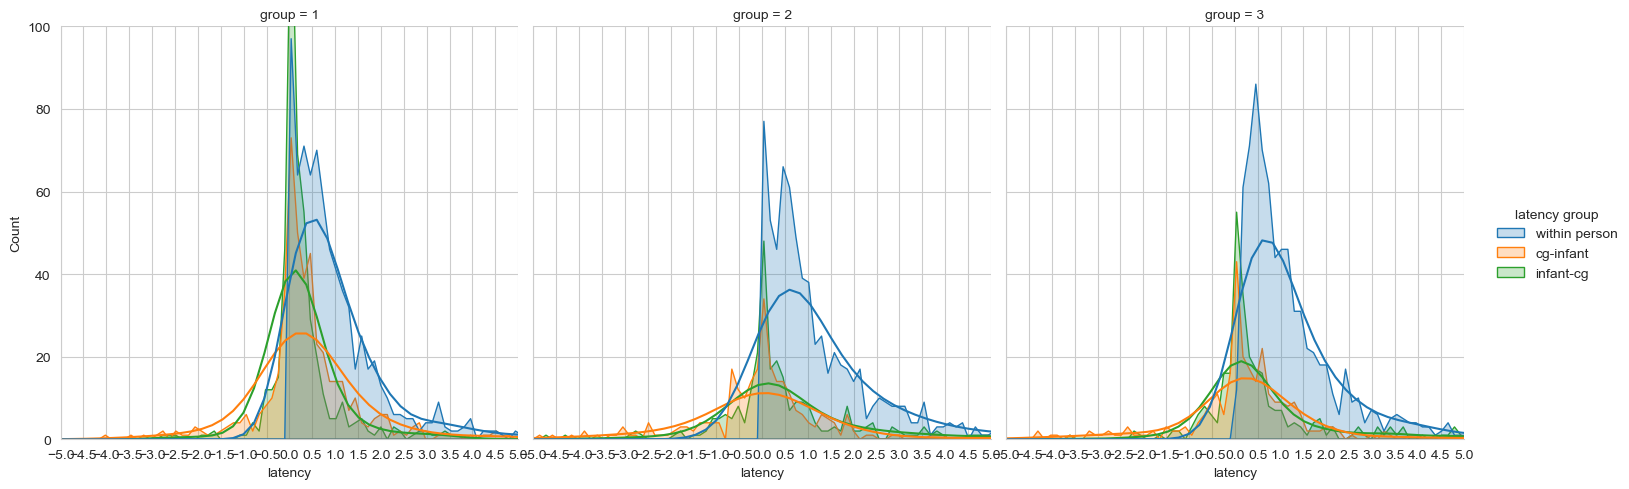

In [99]:
sns.displot(data=datanew, x='latency', kind='hist', element = 'poly', kde=True, col='group', hue='latency group')
plt.xlim(-5,5)
plt.xticks([-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.ylim(0,100)

(0.0, 130.0)

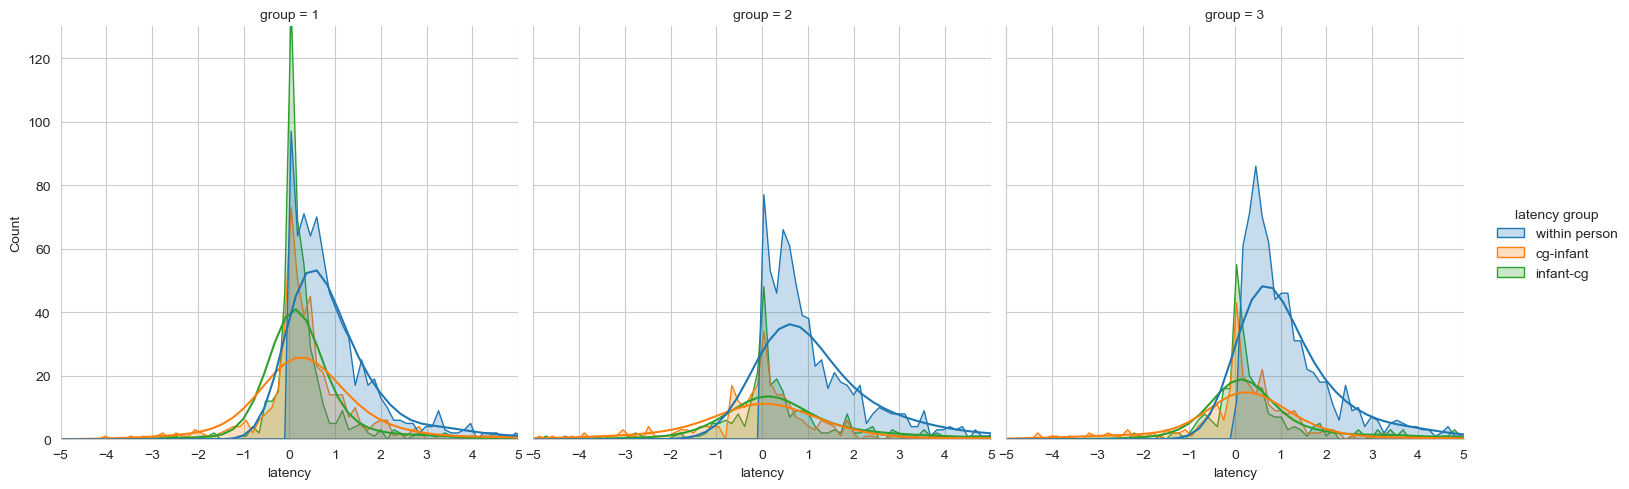

In [101]:
sns.displot(data=datanew, x='latency', kind='hist', element = 'poly', kde=True, col='group', hue='latency group')
plt.xlim(-5,5)
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
plt.ylim(0,130)

In [ ]:
sns.displot(data=datanew, x='latency', kind='hist', element = 'poly', kde=True, col='group', hue='latency group')
plt.xlim(-3,3)
plt.xticks([-3,-2,-1,0,1,2,3])
plt.ylim(0,130)